# Using Linear Regression Model To Predict Boston's Housing Price

In [71]:
# Import library
import pandas as pd

# Load data
data = pd.read_csv('boston.csv')

data = data.drop(data.columns[[0]], axis=1)
data.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


The dataset contains 506 cases. There are 14 features: <br>
CRIM - per capita crime rate by town <br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft. <br>
INDUS - proportion of non-retail business acres per town. <br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br>
NOX - nitric oxides concentration (parts per 10 million) <br>
RM - average number of rooms per dwelling <br>
AGE - proportion of owner-occupied units built prior to 1940 <br>
DIS - weighted distances to five Boston employment centres <br>
RAD - index of accessibility to radial highways <br>
TAX - full-value property-tax rate per 10,000 dollars <br>
PTRATIO - pupil-teacher ratio by town <br>
Black - (Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
LSTAT - % lower status of the population <br>
MEDV - Median value of owner-occupied homes in 1000's dollars

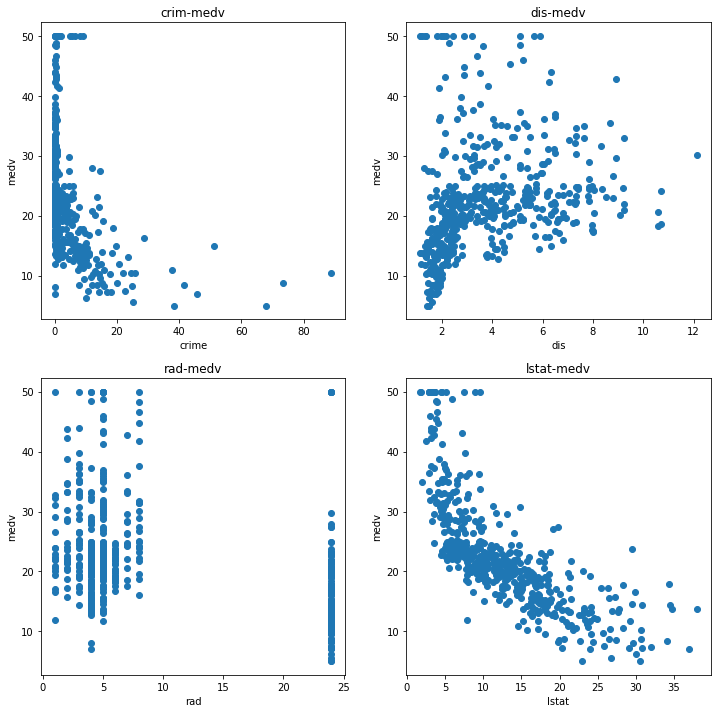

In [72]:
# We first visualize the data to get some sense about it.
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

def set_graph(ax, x_label, y_label, title):
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

axs[0, 0].scatter(data['crim'], data['medv'])
set_graph(axs[0, 0], 'crime', 'medv', 'crim-medv')

axs[0, 1].scatter(data['dis'], data['medv'])
set_graph(axs[0, 1], 'dis', 'medv', 'dis-medv')

axs[1, 0].scatter(data['rad'], data['medv'])
set_graph(axs[1, 0], 'rad', 'medv', 'rad-medv')

axs[1, 1].scatter(data['lstat'], data['medv'])
set_graph(axs[1, 1], 'lstat', 'medv', 'lstat-medv')

plt.show()

### The graphs show the affect of crime rate, and lower status of the population to the housing price. There is a negative relationship between crime rate and the housing prices. It is similar to lower status of population and housing prices.

In [73]:
# Get features from the data (columns 1 - 4)
features = data.iloc[:, :13]
# Get targets from the data (The last column)
targets = data['medv']

In [74]:
# Now we devide the data into two parts - training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets)

In [75]:
# Load libraries
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

# Fit the linear regression
model = regression.fit(X_train, y_train)

In [76]:
# Print the scores to see how well the model perform on the training set
print('Training accuracy: {0:.2f}'.format(model.score(X_train, y_train)))

Training accuracy: 0.73


In [77]:
print('Test accuracy: {0:.2f}'.format(model.score(X_test, y_test)))

Test accuracy: 0.71


### The model get 73% and 71% accurate on the training set and the test set respectively. It is not a bad model for a complex data set as this one.